In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import sklearn
import math
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder

In [3]:
# load the .csv files in dataframe
def load_data():
    df_features = pd.read_csv("train_features.csv")
    df_labels = pd.read_csv("train_labels.csv")
    df_validate_features = pd.read_csv("valid_features.csv")
    df_validate_labels = pd.read_csv("valid_labels.csv")
    df_test_features = pd.read_csv("test_features.csv")
    return df_features, df_labels, df_validate_features, df_validate_labels, df_test_features

In [4]:
#preprocessing of data to extract metadata and text features
def preprocess(df):
    df1 = df.loc[:,'loudness':'duration']
    df2 = df.loc[:,'title']
    df2 = df2.str.get_dummies(sep=' ').add_prefix('title')
    df3 = df.loc[:,'tags']
    df3 = df3.str.get_dummies(sep=', ').add_prefix('tags')
    return pd.concat([df1,df2,df3],axis=1)

In [5]:
# train the data using logistic regression
import sklearn
from sklearn.linear_model import LogisticRegression

def train(train_features,train_label):
    lr = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
    tl = train_label['genre']
    lr.fit(train_features, tl)
    return lr

In [6]:
# train the data using naive bayes
import sklearn
from sklearn.naive_bayes import GaussianNB

def train_nb(train_features,train_label):
    gnb = GaussianNB()
    tl = train_label['genre']
    gnb.fit(train_features, tl)
    return gnb

In [7]:
# train the data using decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

def train_dt(train_features,train_label):
    calssifier = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5) 
    calssifier.fit(train_features, train_label) 
    return calssifier

In [8]:
# predict the most common class
def zero_R_Baseline(label):
    priors = [0]*len(set(label))
    for i in label:
        priors[i] += 1
    pred = [np.argmax(priors)]*len(label)
    return pred

In [9]:
# predict the class based on trained classifier
def predict(classifier, test_features):
    preds = classifier.predict(test_features)
    return preds

In [10]:
# Evaluation of a set of predictions in terms of matrix
from sklearn import metrics
def evaluate(label,pred):
    CM = metrics.confusion_matrix(label, pred) # Confusion Matrix
    cr=metrics.classification_report(label, pred)
    return CM, cr

In [11]:
# plot the confusion matrix
import matplotlib.pyplot as plt
def plot(cm):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
    ax.set_ylabel('Actual outputs', fontsize=12, color='black')
    ax.xaxis.set(ticks=range(8))
    ax.yaxis.set(ticks=range(8))
    for i in range(8):
        for j in range(8):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
    plt.show()

In [12]:
#load and preprocess the data
train_features, train_label, validate_features, validate_labels, test_features = load_data()
train_features_p = preprocess(train_features)
validate_features_p = preprocess(validate_features)
test_features_p = preprocess(test_features)

### Baseline Performance (zero-R baseline)

C:\Users\avipa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



evaluation of Testing Data using zero-R baseline

Confusion Matrix:


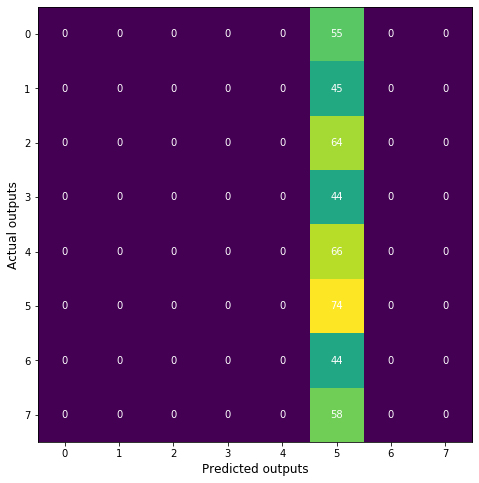

None
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.00      0.00      0.00        45
           2       0.00      0.00      0.00        64
           3       0.00      0.00      0.00        44
           4       0.00      0.00      0.00        66
           5       0.16      1.00      0.28        74
           6       0.00      0.00      0.00        44
           7       0.00      0.00      0.00        58

    accuracy                           0.16       450
   macro avg       0.02      0.12      0.04       450
weighted avg       0.03      0.16      0.05       450



In [13]:
# evaluation of 0-R baseline
lb = LabelEncoder()
label = lb.fit_transform(validate_labels["genre"])
preds = zero_R_Baseline(label)
CM, cr = evaluate(label,preds)
print("\nevaluation of Testing Data using zero-R baseline\n");
print("Confusion Matrix:")
print(plot(CM))
print(cr)

### Perfromance of Logistic Regression on Metadata and Text Features


evaluation of Testing Data using Logistic Regression

Confusion Matrix:


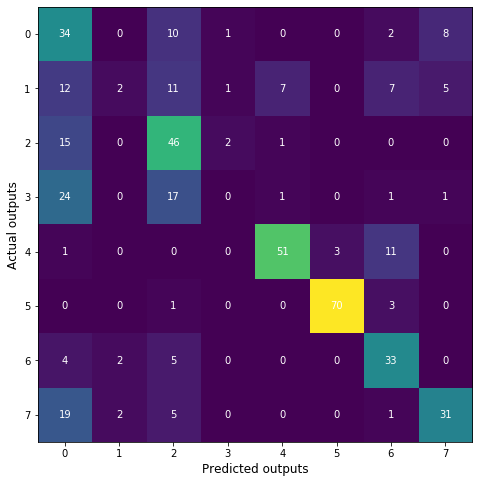

None
                       precision    recall  f1-score   support

 classic pop and rock       0.31      0.62      0.41        55
dance and electronica       0.33      0.04      0.08        45
                 folk       0.48      0.72      0.58        64
       jazz and blues       0.00      0.00      0.00        44
                metal       0.85      0.77      0.81        66
                  pop       0.96      0.95      0.95        74
                 punk       0.57      0.75      0.65        44
      soul and reggae       0.69      0.53      0.60        58

             accuracy                           0.59       450
            macro avg       0.52      0.55      0.51       450
         weighted avg       0.57      0.59      0.56       450



In [14]:
# evaluation using logistic regression
classifier = train(train_features_p,train_label)
validate_features_p = validate_features_p.reindex(labels=train_features_p.columns,fill_value=0,axis=1)
preds = predict(classifier,validate_features_p)
label = validate_labels['genre']
CM, cr = evaluate(label,preds)
print("\nevaluation of Testing Data using Logistic Regression\n");
print("Confusion Matrix:")
print(plot(CM))
print(cr)

### Perfromance of Naive Bayes on Metadata and Text Features


evaluation of Testing Data using Naive Bayes

Confusion Matrix:


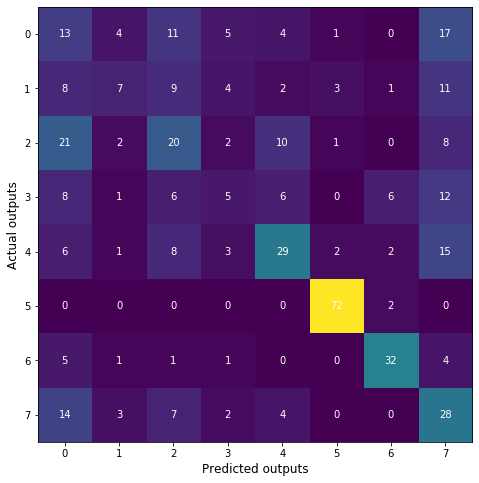

None
                       precision    recall  f1-score   support

 classic pop and rock       0.17      0.24      0.20        55
dance and electronica       0.37      0.16      0.22        45
                 folk       0.32      0.31      0.32        64
       jazz and blues       0.23      0.11      0.15        44
                metal       0.53      0.44      0.48        66
                  pop       0.91      0.97      0.94        74
                 punk       0.74      0.73      0.74        44
      soul and reggae       0.29      0.48      0.37        58

             accuracy                           0.46       450
            macro avg       0.45      0.43      0.43       450
         weighted avg       0.46      0.46      0.45       450



In [15]:
# evaluation using Naive Bayes
classifier = train_nb(train_features_p,train_label)
preds = predict(classifier,validate_features_p)
label = validate_labels['genre']
CM, cr = evaluate(label,preds)
print("\nevaluation of Testing Data using Naive Bayes\n");
print("Confusion Matrix:")
print(plot(CM))
print(cr)

### Perfromance of Decision Tree on Metadata and Text Features

C:\Users\avipa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



evaluation of Testing Data using Decision Tree

Confusion Matrix:


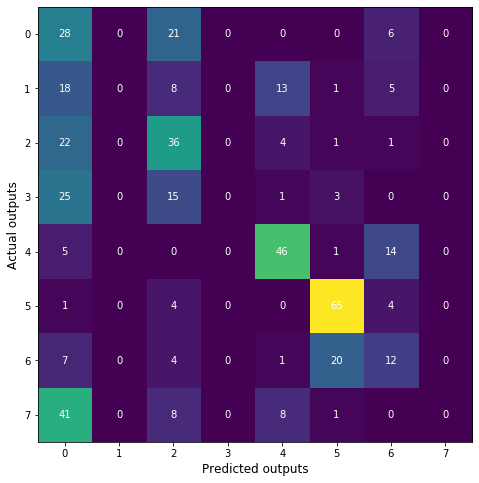

None
              precision    recall  f1-score   support

           0       0.19      0.51      0.28        55
           1       0.00      0.00      0.00        45
           2       0.38      0.56      0.45        64
           3       0.00      0.00      0.00        44
           4       0.63      0.70      0.66        66
           5       0.71      0.88      0.78        74
           6       0.29      0.27      0.28        44
           7       0.00      0.00      0.00        58

    accuracy                           0.42       450
   macro avg       0.27      0.36      0.31       450
weighted avg       0.31      0.42      0.35       450



In [16]:
# evaluation using decision tree classifier
lb = LabelEncoder()
train_label_p = lb.fit_transform(train_label["genre"])
validate_labels_p = lb.fit_transform(validate_labels["genre"])
classifier = train_dt(train_features_p,train_label_p)
validate_features_p = validate_features_p.reindex(labels=train_features_p.columns,fill_value=0,axis=1)
preds = predict(classifier,validate_features_p)
CM, cr = evaluate(validate_labels_p,preds)
print("\nevaluation of Testing Data using Decision Tree\n");
print("Confusion Matrix:")
print(plot(CM))
print(cr)

In [17]:
#generate test_label file for kaggle competition
test_features_p = test_features_p.reindex(labels=train_features_p.columns,fill_value=0,axis=1)
preds = predict(classifier,test_features_p)
preds = pd.DataFrame(preds,columns = ['genre'])
df = pd.concat([test_features['trackID'],preds],axis = 1)
df.to_csv("foo.csv",index = None)